In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing  import StandardScaler
%matplotlib inline
sns.set_style('white')

In [2]:
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:, 1:].dropna()

In [3]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
df.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [6]:
df.student.value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [3]:
df['default'] = np.where(df['default'] == 'Yes', 1, 0)
df['student'] = np.where(df['student'] == 'Yes', 1, 0)

In [4]:
df = pd.DataFrame(StandardScaler().fit_transform(df), columns= df.columns)

In [13]:
df.head()

,default,student,balance,income
0,-0.185599,-0.645936,-0.218835,0.813187
1,-0.185599,1.548141,-0.037616,-1.605496
2,-0.185599,-0.645936,0.492410,-0.131212
3,-0.185599,-0.645936,-0.632893,0.164031
4,-0.185599,-0.645936,-0.102791,0.370915


In [5]:
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

# Set up the regression model to predict defaults using all other
# variables as features.
regr1 = linear_model.LinearRegression()
Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]
regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))
origparams = np.append(regr1.coef_, regr1.intercept_)


R-squared simple model:
0.573878496272


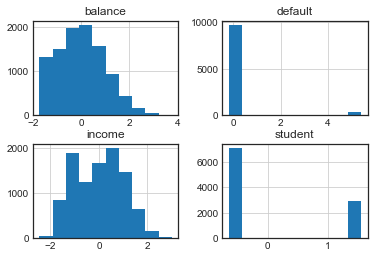

In [15]:
df.hist()
plt.show()

In [6]:
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

In [7]:
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']

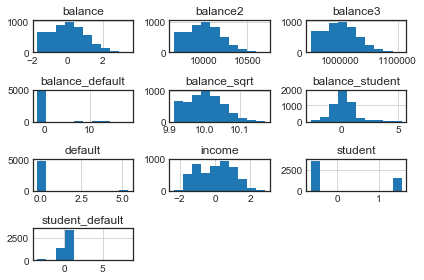

In [20]:
df_train.hist()
plt.tight_layout()
plt.show()

In [8]:
origparams

array([  1.36873063e-02,  -7.59472350e-01,   2.21504775e-05,
        -1.46121929e-03])

In [9]:
# Re-run the model with the new features.
regrBig = linear_model.LinearRegression()
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]
regrBig.fit(X_train2, Y_train)
print('\nR-squared complex model:')
print(regrBig.score(X_train2, Y_train))

# Store the new parameter estimates for the same features.
newparams = np.append(
    regrBig.coef_[0,0:(len(origparams)-1)],
    regrBig.intercept_)


R-squared complex model:
0.573973445207


In [27]:
newparams

array([ -3.96993983e-03,  -7.58973694e-01,   4.15786637e+03,
         5.53434550e+05])

In [10]:
print('\nParameter Estimates for the same predictors for the small model '
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})


print('\n array1 ')
print(origparams)
print('\n array2 ')
print(newparams)
print('\n both ')
print(compare)
print('\n compare ')
print(prettycompare)


Parameter Estimates for the same predictors for the small model and large model:

 array1 
[  1.36873063e-02  -7.59472350e-01   2.21504775e-05  -1.46121929e-03]

 array2 
[ -3.96993983e-03  -7.58973694e-01   4.15786637e+03   5.53434550e+05]

 both 
[[  1.36873063e-02  -3.96993983e-03]
 [ -7.59472350e-01  -7.58973694e-01]
 [  2.21504775e-05   4.15786637e+03]
 [ -1.46121929e-03   5.53434550e+05]]

 compare 
[[0.014 -0.004]
 [-0.759 -0.759]
 [0.000 4157.866]
 [-0.001 553434.550]]


In [11]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]


ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

print('\nParameter Estimates for the same predictors for the small model'
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print('original params :' , origparams)
print('\n New params :' , newparams)

print('\n compare : ', prettycompare)

0.57387391644
0.573946428961

Parameter Estimates for the same predictors for the small modeland large model:
original params : [  1.36988466e-02  -7.57859433e-01  -3.25298557e-04]

 New params : [-0.00218345 -0.75715689  0.047705  ]

 compare :  [[0.014 -0.002]
 [-0.758 -0.757]
 [-0.000 0.048]]


In [32]:
X_train.corr()

,default,student,balance
default,1.000000,0.045608,0.359896
student,0.045608,1.000000,0.222489
balance,0.359896,0.222489,1.000000


In [33]:
X_train2.corr()

,default,student,balance,balance_sqrt,balance2,balance3,balance_student,balance_default,student_default
default,1.000000,0.045608,0.359896,0.358669,0.362352,0.364813,0.082268,0.934609,0.203987
student,0.045608,1.000000,0.222489,0.222404,0.222655,0.222814,0.191496,0.045258,0.046272
balance,0.359896,0.222489,1.000000,0.999995,0.999980,0.999920,0.077130,0.300658,0.078068
balance_sqrt,0.358669,0.222404,0.999995,1.000000,0.999955,0.999875,0.076103,0.299092,0.077479
balance2,0.362352,0.222655,0.999980,0.999955,1.000000,0.999980,0.079190,0.303802,0.079254
balance3,0.364813,0.222814,0.999920,0.999875,0.999980,1.000000,0.081258,0.306964,0.080452
balance_student,0.082268,0.191496,0.077130,0.076103,0.079190,0.081258,1.000000,0.124622,0.385656
balance_default,0.934609,0.045258,0.300658,0.299092,0.303802,0.306964,0.124622,1.000000,0.294818
student_default,0.203987,0.046272,0.078068,0.077479,0.079254,0.080452,0.385656,0.294818,1.000000


In [12]:
# Store estimates.
estimates = np.append(ridgeregrBig.coef_, [10])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    estimates = np.row_stack((
        estimates,
        np.append(ridgeregrBig.coef_,[lambd])))
    


In [13]:
# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train2.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)
estimates_df.head()

,default,student,balance,balance_sqrt,balance2,balance3,balance_student,balance_default,student_default,lambda
1,-0.004278,-0.758735,0.191749,-0.017950,0.001952,-0.000019,-0.002308,0.011487,-0.004209,1.0
2,-0.003228,-0.758358,0.115052,-0.010782,0.001169,-0.000012,-0.002949,0.010465,-0.004002,3.0
3,-0.002750,-0.758007,0.082093,-0.007695,0.000833,-0.000008,-0.003258,0.010015,-0.003904,5.0
4,-0.002464,-0.757664,0.063760,-0.005977,0.000646,-0.000006,-0.003457,0.009758,-0.003844,7.0
5,-0.002264,-0.757325,0.052085,-0.004883,0.000528,-0.000005,-0.003606,0.009587,-0.003800,9.0


['default', 'student', 'balance', 'balance_sqrt', 'balance2', 'balance3', 'balance_student', 'balance_default', 'student_default']


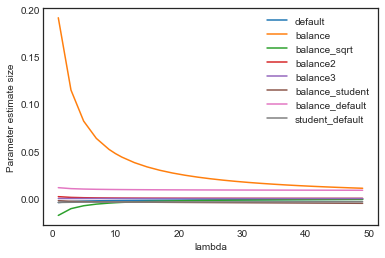

In [14]:

# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])
print(varstoplot)
varstoplot.remove('student')

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

['default', 'student', 'balance', 'balance_sqrt', 'balance2', 'balance3', 'balance_student', 'balance_default', 'student_default']


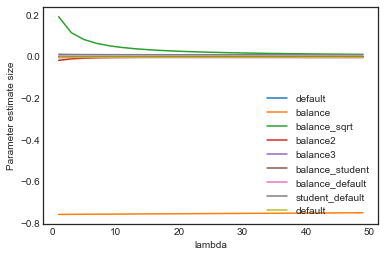

In [15]:
# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])
print(varstoplot)
#varstoplot.remove('student')

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

# 3.3.3

In [16]:
df2= df.loc[:,:]
df2['balance_sqrt'] = (df['balance'] + 100) ** .5
df2['balance2'] = (df['balance'] + 100) ** 2
df2['balance3'] = (df['balance'] + 100) ** 3
df2['balance_student'] = df['balance'] * df['student']
df2['balance_default'] = df['balance'] * df['default']
df2['student_default'] = df['student'] * df['default']
print(df2.shape)

(10000, 10)


In [17]:
trainsize = int(df2.shape[0] / 2)
df2_test = df2.iloc[trainsize:, :].copy()
df2_train = df2.iloc[:trainsize, :].copy()

Y_train = df2_train['income'].values.reshape(-1, 1)
X_train = df2_train.loc[:, ~(df2_train.columns).isin(['income'])]
Y_test = df2_test['income'].values.reshape(-1, 1)
X_test = df2_test.loc[:, ~(df2_test.columns).isin(['income'])]

In [18]:
print('shape of train data : ',X_train.shape )
print('shape of test data : ',X_test.shape )

shape of train data :  (5000, 9)
shape of test data :  (5000, 9)


C:\Users\gyans\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


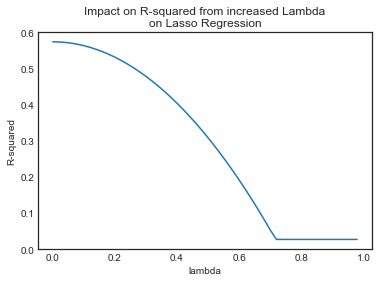

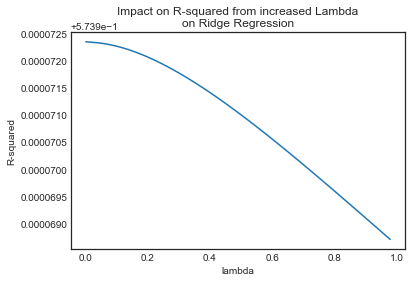

In [31]:
las_r2 = []
ridge_r2 = []


for lambd in np.arange(0.0001, 1, 0.02):
    lassBig = linear_model.Lasso(alpha=lambd)
    lassBig.fit(X_train2, Y_train)
    las_r2.append([lambd, lassBig.score(X_train2, Y_train)])
    

    ridgeBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeBig.fit(X_train2, Y_train)
    ridge_r2.append([lambd, ridgeBig.score(X_train2, Y_train)])


las_r2_df = pd.DataFrame(
    las_r2,columns=['lambda']+['R-squared_Lasso'])
las_r2_df.sort_values(by='lambda', inplace=True, ascending=True)

ridge_r2_df = pd.DataFrame(
    ridge_r2,
    columns=['lambda']+['R-squared_Ridge'])
ridge_r2_df.sort_values(by='lambda', inplace=True, ascending=True)


#Plotting r-squared for each lambda
plt.plot(las_r2_df['lambda'], las_r2_df['R-squared_Lasso'], label='Lasso')
plt.xlabel('lambda')
plt.ylabel('R-squared')
plt.title('Impact on R-squared from increased Lambda\non Lasso Regression')
plt.show()

plt.plot(ridge_r2_df['lambda'], ridge_r2_df['R-squared_Ridge'], label='Ridge')
plt.xlabel('lambda')
plt.ylabel('R-squared')
plt.title('Impact on R-squared from increased Lambda\non Ridge Regression')
plt.show()

In [34]:
result = pd.merge(las_r2_df, ridge_r2_df , on = 'lambda')
print(result.head(20))

    lambda  R-squared_Lasso  R-squared_Ridge
0   0.0001         0.573940         0.573972
1   0.0201         0.573369         0.573972
2   0.0401         0.572000         0.573972
3   0.0601         0.569872         0.573972
4   0.0801         0.566895         0.573972
5   0.1001         0.563068         0.573972
6   0.1201         0.558392         0.573972
7   0.1401         0.552866         0.573972
8   0.1601         0.546491         0.573972
9   0.1801         0.539267         0.573972
10  0.2001         0.531193         0.573972
11  0.2201         0.522269         0.573972
12  0.2401         0.512496         0.573972
13  0.2601         0.501874         0.573972
14  0.2801         0.490402         0.573972
15  0.3001         0.478081         0.573972
16  0.3201         0.464909         0.573972
17  0.3401         0.450888         0.573972
18  0.3601         0.436018         0.573972
19  0.3801         0.420299         0.573971


as lambda increases, r-squared decreases for both Lasso and Ridge regression. This tells us that it is important to keep the regularization parameter, lambda, as low as possible. This also shows us that small changes in lambda in Lasso Regression cause dramatic decreases in R-squared, whereas the same change in Ridge Regression is not as dramatic.